# Experiment: Information Propagation

This notebook tests the percentage of consistent nodes using a very light-weight communication model in relation to the cohesion strategy

In [6]:
"""Load libraries
"""
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = [12, 8]

import math
import numpy as np

from utils import init_simulation, run_simulation

from events import InfoExternal

num_fish = 48
clock_freq = 15  # in Hz
single_time = num_fish  # run time of one trial
offset_time = 1  # offset in sec when the first trial starts
num_trials = 50
final_buffer = 3
run_time = single_time * num_trials + final_buffer # in seconds
run_time /= (clock_freq * 0.9)
size_dist = 500
center = size_dist / 2.0
conn_drop = 2.0

seed_fish_id = 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Each fish as at most 2 neighbors it can likely communicate with

Please wait patiently 178.0 seconds. Thanks.
It's time to say bye bye!


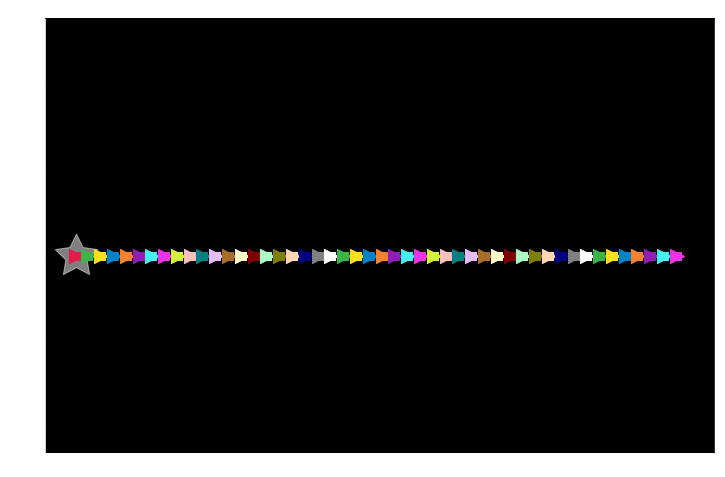

Num. Fish with Correct Info: [3, 1, 1, 3, 2, 3, 2, 1, 1, 7, 4, 5, 1, 4, 5, 4, 13, 3, 4, 2, 12, 5, 1, 1, 2, 2, 4, 2, 6, 4, 5, 1, 1, 8, 1, 1, 3, 5, 1, 1, 1, 5, 2, 5, 5, 9, 7, 1, 1, 2]
Num. Hops: [2, 0, 0, 2, 1, 2, 1, 0, 0, 3, 2, 4, 0, 3, 4, 3, 9, 2, 2, 1, 6, 3, 0, 0, 1, 1, 3, 1, 5, 2, 4, 0, 0, 5, 0, 0, 2, 2, 0, 0, 0, 3, 1, 3, 3, 7, 5, 0, 0, 1]


In [7]:
fish_pos = np.zeros((num_fish, 2))
fish_pos[:,0] = np.arange(num_fish) + center - (num_fish / 2)
fish_pos[:,1] = center

channel, environment, fish, interaction, observer = init_simulation(
    clock_freq=clock_freq,
    single_time=single_time,
    offset_time=offset_time,
    num_trials=num_trials,
    final_buffer=final_buffer,
    run_time=run_time,
    num_fish=num_fish,
    size_dist=size_dist,
    center=center,
    spread=20,
    fish_pos=fish_pos,
    lim_neighbors=[1, math.inf],
    neighbor_weights=1.0,
    fish_max_speeds=1,
    noise_magnitude=0,
    conn_thres=1.25,
    prob_type='sigmoid',
    dist_type='none',
    verbose=False,
    conn_drop=conn_drop
)

for i in range(num_trials):
    observer.instruct(
        event=InfoExternal(message=i, track=True),
        rel_clock=i * single_time + offset_time,
        fish_id=seed_fish_id
    )
observer.study('info')  # Store information on the info propagation

run_simulation(fish=fish, observer=observer, run_time=run_time, dark=True, white_axis=True, no_legend=True)

### Each fish as at most 3 neighbors it can likely communicate with

Please wait patiently 178.0 seconds. Thanks.
It's time to say bye bye!


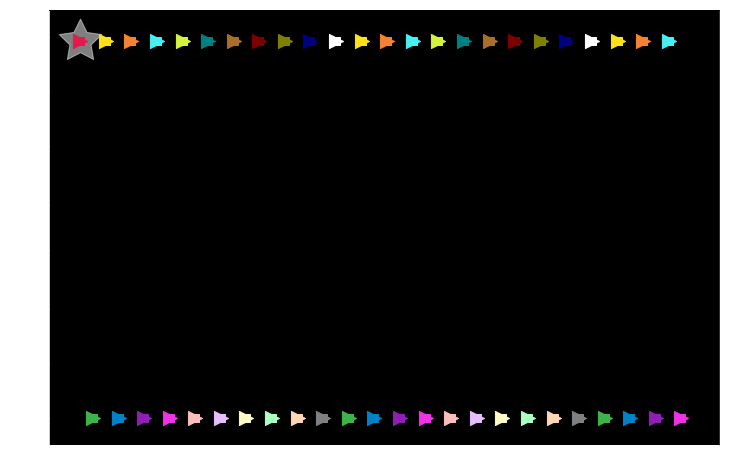

Num. Fish with Correct Info: [1, 30, 36, 6, 7, 21, 17, 38, 1, 22, 3, 7, 34, 25, 27, 16, 33, 20, 45, 29, 20, 2, 19, 48, 30, 26, 41, 10, 4, 9, 1, 31, 5, 16, 21, 47, 4, 40, 10, 5, 2, 17, 19, 1, 13, 32, 6, 1, 48, 1]
Num. Hops: [0, 17, 18, 3, 3, 11, 8, 18, 0, 12, 1, 3, 18, 13, 16, 7, 15, 10, 26, 16, 10, 1, 12, 22, 15, 13, 22, 4, 1, 5, 0, 15, 3, 9, 9, 24, 2, 22, 5, 3, 1, 8, 10, 0, 6, 15, 4, 0, 26, 0]


In [8]:
fish_pos = np.zeros((num_fish, 2))
fish_pos[:,0] = np.arange(num_fish) + center - (num_fish / 2)
fish_pos[:,1] = center
fish_pos[::2][:,1] += math.sqrt(3)

channel, environment, fish, interaction, observer = init_simulation(
    clock_freq=clock_freq,
    single_time=single_time,
    offset_time=offset_time,
    num_trials=num_trials,
    final_buffer=final_buffer,
    run_time=run_time,
    num_fish=num_fish,
    size_dist=size_dist,
    center=center,
    spread=20,
    fish_pos=fish_pos,
    lim_neighbors=[1, math.inf],
    neighbor_weights=1.0,
    fish_max_speeds=1,
    noise_magnitude=0,
    conn_thres=2.25,
    prob_type='sigmoid',
    dist_type='none',
    verbose=False,
    conn_drop=conn_drop
)

for i in range(num_trials):
    observer.instruct(
        event=InfoExternal(message=i, track=True),
        rel_clock=i * single_time + offset_time,
        fish_id=seed_fish_id
    )
observer.study('info')  # Store information on the info propagation

run_simulation(fish=fish, observer=observer, run_time=run_time, dark=True, white_axis=True, no_legend=True)

### Each fish as at most 4 neighbors it can likely communicate with

Please wait patiently 178.0 seconds. Thanks.
It's time to say bye bye!


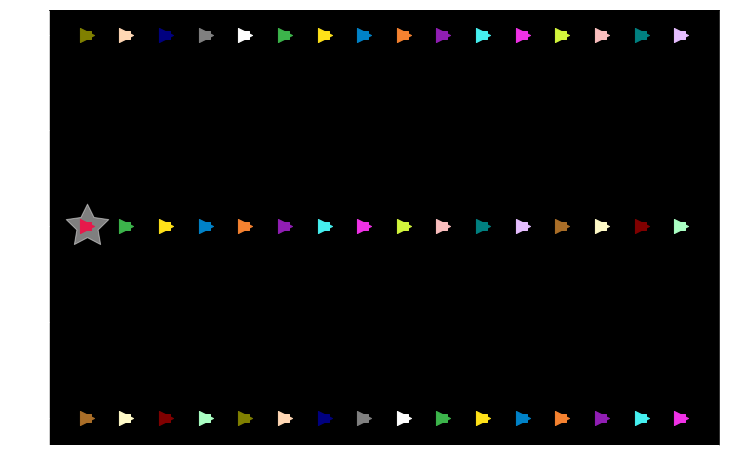

Num. Fish with Correct Info: [48, 48, 48, 48, 48, 48, 48, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
Num. Hops: [10, 9, 9, 11, 9, 6, 10, 11, 8, 10, 10, 11, 11, 11, 10, 8, 10, 9, 10, 8, 11, 9, 9, 10, 9, 10, 8, 10, 10, 9, 7, 8, 8, 12, 10, 11, 9, 11, 9, 8, 7, 10, 11, 9, 9, 10, 9, 10, 10, 11]


In [9]:
fish_pos = np.zeros((num_fish, 2))

third = int(num_fish / 3)

fish_pos[0:third, 0] = np.arange(num_fish / 3) + center - (num_fish / 6)
fish_pos[third:2*third, 0] = np.arange(num_fish / 3) + center - (num_fish / 6)
fish_pos[2*third:num_fish, 0] = np.arange(num_fish / 3) + center - (num_fish / 6)
fish_pos[:,1] = center

fish_pos[third:2*third][:,1] += 0.1
fish_pos[2*third:num_fish][:,1] -= 0.1

channel, environment, fish, interaction, observer = init_simulation(
    clock_freq=clock_freq,
    single_time=single_time,
    offset_time=offset_time,
    num_trials=num_trials,
    final_buffer=final_buffer,
    run_time=run_time,
    num_fish=num_fish,
    size_dist=size_dist,
    center=center,
    spread=20,
    fish_pos=fish_pos,
    lim_neighbors=[1, math.inf],
    neighbor_weights=1.0,
    fish_max_speeds=1,
    noise_magnitude=0,
    conn_thres=1.25,
    prob_type='sigmoid',
    dist_type='none',
    verbose=False,
    conn_drop=conn_drop
)

for i in range(num_trials):
    observer.instruct(
        event=InfoExternal(message=i, track=True),
        rel_clock=i * single_time + offset_time,
        fish_id=seed_fish_id
    )
observer.study('info')  # Store information on the info propagation

run_simulation(fish=fish, observer=observer, run_time=run_time, dark=True, white_axis=True, no_legend=True)